## 计算两只股票在<font color=red>不同投资比例,固定相关系数</font>条件下的投资组合收益和风险

### 1. 用tushare找2只股票（自己决定，合理即可）

In [3]:
import tushare as ts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 设置tushare token
ts.set_token('d5c78fbfa31bc713842d154cc6edcfb0d03c4a2178e0568a67119d94')

# 初始化tushare客户端
pro = ts.pro_api()

# 获取两只股票的代码（这里以'000001.SZ'和'600036.SH'为例，你也可以自己指定）
stock1_code = '000001.SZ'
stock2_code = '600036.SH'

### 2. 分别求出2只股票的收益率

In [11]:
# 获取股票数据
stock1_data = pro.daily(ts_code=stock1_code, start_date='20210101', end_date='20211031')
stock2_data = pro.daily(ts_code=stock2_code, start_date='20210101', end_date='20211031')
stock1_data
stock2_data
 将日期列转换为日期时间类型并按日期排序
stock1_data['trade_date'] = pd.to_datetime(stock1_data['trade_date'])
stock1_data = stock1_data.sort_values(by='trade_date')
stock2_data['trade_date'] = pd.to_datetime(stock2_data['trade_date'])
stock2_data = stock2_data.sort_values(by='trade_date')

# 计算每日收益率
stock1_data['return'] = stock1_data['close'].pct_change()
stock2_data['return'] = stock2_data['close'].pct_change()

# 移除第一天的数据，因为收益率无法计算
stock1_data = stock1_data.dropna()
stock2_data = stock2_data.dropna()

# 2. 计算每只股票的收益率
stock1_returns = stock1_data['return']
stock2_returns = stock2_data['return']


,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,600036.SH,20211029,54.22,54.75,53.70,53.97,54.22,-0.25,-0.4611,405439.43,2197661.117
1,600036.SH,20211028,54.30,55.00,53.85,54.22,54.52,-0.30,-0.5503,346232.28,1883008.799
2,600036.SH,20211027,55.20,55.20,53.83,54.52,55.30,-0.78,-1.4105,420394.41,2287323.386
3,600036.SH,20211026,54.59,56.23,54.30,55.30,54.59,0.71,1.3006,715423.69,3961794.950
4,600036.SH,20211025,53.83,54.93,53.10,54.59,54.29,0.30,0.5526,623341.26,3376970.796
...,...,...,...,...,...,...,...,...,...,...,...
193,600036.SH,20210108,46.29,47.02,45.81,46.60,45.90,0.70,1.5251,1299594.81,6021482.985
194,600036.SH,20210107,44.29,45.97,44.26,45.90,44.15,1.75,3.9638,1078321.87,4869741.128
195,600036.SH,20210106,42.10,44.20,42.00,44.15,42.18,1.97,4.6705,1200645.63,5188622.737
196,600036.SH,20210105,42.76,42.80,41.44,42.18,43.17,-0.99,-2.2933,1387176.99,5809639.049


### 3. 分别求出2只股票的收益率的相关系数、收益率的标准差

### 4. 构建两只股票的投资组合比例（参考课程数据L1）

### 5. 计算2只股票的平均（期望）收益

### 6. 计算两只股票在<font color=red>不同投资组合比例下</font>的投资组合收益率

### 7. 计算两只股票在<font color=red>不同投资组合比例，固定相关系数下</font>的投资组合风险

### 8. 画出风险收益率图


Correlation coefficient between stock 1 and stock 2: 0.7520947353786391
Standard deviation of stock 1 returns: 0.026151201548543123
Standard deviation of stock 2 returns: 0.02204825072973709

Mean return of stock 1: 0.0005787435361267411
Mean return of stock 2: 0.0013761528736866981

Portfolio return: 0.0009774482049067197

Portfolio standard deviation (risk): 0.02256827793175488


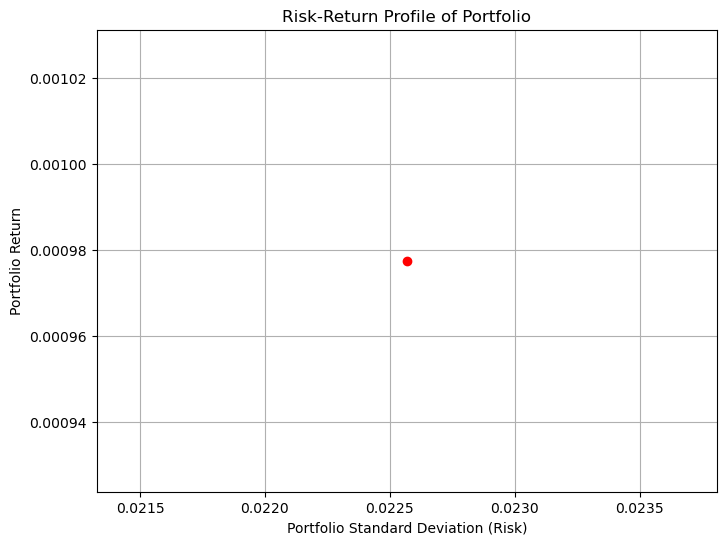

In [2]:
import tushare as ts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 设置tushare token
ts.set_token('d5c78fbfa31bc713842d154cc6edcfb0d03c4a2178e0568a67119d94')

# 初始化tushare客户端
pro = ts.pro_api()
stock1_code = '000001.SZ'
stock2_code = '600036.SH'

# 获取股票数据
stock1_data = pro.daily(ts_code=stock1_code, start_date='20210101', end_date='20211031')
stock2_data = pro.daily(ts_code=stock2_code, start_date='20210101', end_date='20211031')

# 将日期列转换为日期时间类型并按日期排序
stock1_data['trade_date'] = pd.to_datetime(stock1_data['trade_date'])
stock1_data = stock1_data.sort_values(by='trade_date')
stock2_data['trade_date'] = pd.to_datetime(stock2_data['trade_date'])
stock2_data = stock2_data.sort_values(by='trade_date')

# 计算每日收益率
stock1_data['return'] = stock1_data['close'].pct_change()
stock2_data['return'] = stock2_data['close'].pct_change()
stock1_data = stock1_data.dropna()
stock2_data = stock2_data.dropna()

# 2. 计算每只股票的收益率
stock1_returns = stock1_data['return']
stock2_returns = stock2_data['return']

# 3. 计算收益率的相关系数和标准差
correlation = np.corrcoef(stock1_returns, stock2_returns)[0, 1]
std_dev_stock1 = np.std(stock1_returns)
std_dev_stock2 = np.std(stock2_returns)

print("\nCorrelation coefficient between stock 1 and stock 2:", correlation)
print("Standard deviation of stock 1 returns:", std_dev_stock1)
print("Standard deviation of stock 2 returns:", std_dev_stock2)

# 4. 构建投资组合比例
stock1_weight = 0.5
stock2_weight = 0.5

# 5. 计算平均收益率
mean_return_stock1 = np.mean(stock1_returns)
mean_return_stock2 = np.mean(stock2_returns)

print("\nMean return of stock 1:", mean_return_stock1)
print("Mean return of stock 2:", mean_return_stock2)

# 6. 计算投资组合收益率
portfolio_return = stock1_weight * mean_return_stock1 + stock2_weight * mean_return_stock2
print("\nPortfolio return:", portfolio_return)

# 7. 计算投资组合标准差（风险）
portfolio_std_dev = np.sqrt((stock1_weight**2 * std_dev_stock1**2) + (stock2_weight**2 * std_dev_stock2**2) + (2 * stock1_weight * stock2_weight * correlation * std_dev_stock1 * std_dev_stock2))
print("\nPortfolio standard deviation (risk):", portfolio_std_dev)

# 8. 绘制风险-收益率图
plt.figure(figsize=(8, 6))
plt.scatter(portfolio_std_dev, portfolio_return, c='red', marker='o')
plt.title('Risk-Return Profile of Portfolio')
plt.xlabel('Portfolio Standard Deviation (Risk)')
plt.ylabel('Portfolio Return')
plt.grid(True)
plt.show()
